In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 1. Data Preparation: 

In [2]:
# load the data
data = pd.read_csv('/DataScienceNotes/Assignments/11-Decision Tree/heart_diseases.csv')

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0


In [4]:
data.shape

(908, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [6]:
data.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


#### 2. Exploratory Data Analysis (EDA): 

In [7]:
data.isna().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [8]:
data[data.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num


<Figure size 1200x800 with 0 Axes>

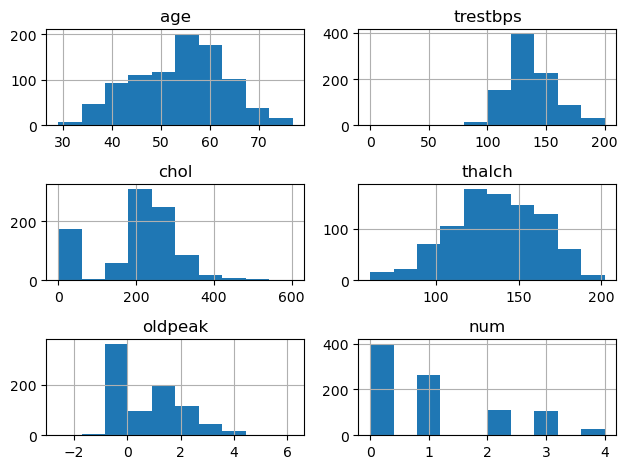

In [9]:
# plot histogram to visualize the distribution of the numerical features
plt.figure(figsize=(12, 8))
data.hist()
plt.tight_layout()
plt.show()

<Figure size 600x300 with 0 Axes>

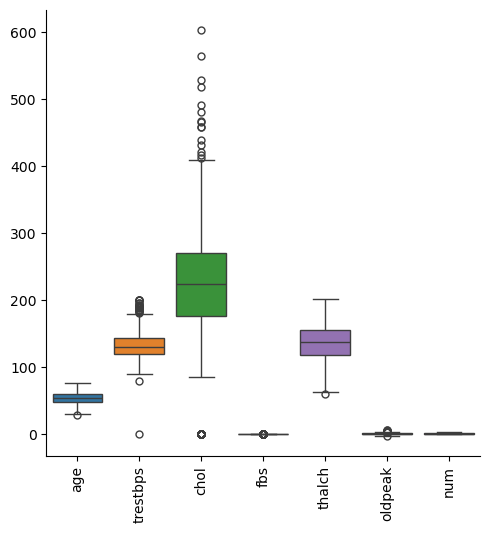

In [10]:
# finding the outliers using the box plot
plt.figure(figsize=(6,3))
sns.catplot(data, kind='box')
plt.xticks(rotation=90)
plt.show()

##### Outliers may dominate tree splits
##### Decision Trees are robust, but extreme outliers can still reduce generalization


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1452\3108038369.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm')


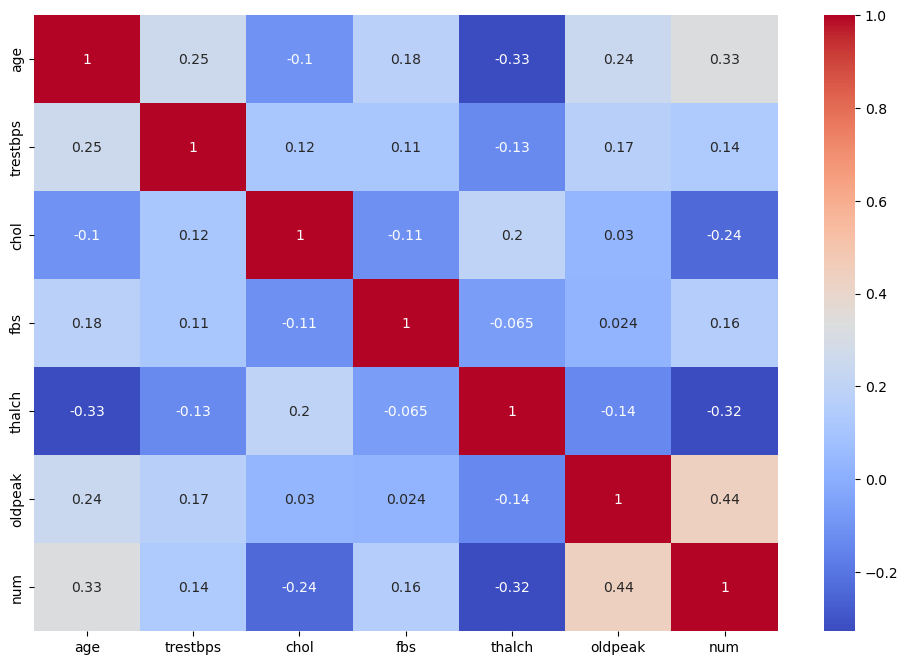

In [11]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

#### 3. Feature Engineering: 

In [12]:
# checking the other place holder such as '?', 'Nan' etc..
for col in data.select_dtypes(include="object").columns:
    print(f"{col}",data[col].unique())

sex ['Male' 'Female']
cp ['typical angina' 'atypical angina' 'asymptomatic' 'non-anginal']
restecg ['lv hypertrophy' 'normal' 'st-t abnormality']
exang ['FALSE' 'TRUE' 'TURE']
slope ['downsloping' 'flat' 'upsloping']
thal ['fixed defect' 'normal' 'reversable defect']


In [13]:
# checking the null values and zeros 
for col in data.select_dtypes(include=["int64", "float64"]).columns:
    print(f"{col}",data[col].unique())

age [63 41 57 52 66 56 48 53 30 54 37 46 68 76 58 42 64 71 69 45 44 39 62 50
 55 49 43 51 36 59 61 60 67 70 47 65 38 34 35 29 74 75 40 72 31 73 33 32
 77]
trestbps [145 135 140 118 110 160 130 155 170 150 125 120 142 100 102 112 146 138
 134 122 136 108 115 104 128 106 156 129 124 126 132 105 152 148  94 180
 178 101 172  80 114 190 113 154 175 133 131 181 188 193 153 179 143  90
  96 163 161 196 107 167 174 158 192 185 144 169  95  92 200 127 121 166
 177 165 117 116 184  97 186 164 123 151   0 137 182]
chol [233 203 192 186 201 228 276 211 260 175 237 226 273 197 240 250 177 248
 265 303 149 234 160 264 242 302 278 220 294 394 214 219 271 213 245 196
 209 141 340 318 243 238 222 208 236 178 275 308 223 204 269 256 180 360
 239 235 262 257 295 417 212 254 283 244 315 306 342 267 198 215 304 247
 266 252 277 325 246 182 168 255 195 199 253 321 157 183 205 210 288 354
 221 268 261 216 439 270 310   0 231 258 227 564 193 298 263 313 309 232
 126 207 179 458 188 297 184 128 224 229 328 34

In [14]:
# select the numerical columns
num_col = data.select_dtypes(include=["int64", "float64"]).columns

In [15]:
# replacing the zero's and null values with calculated median
data[num_col] = data[num_col].replace(0, np.nan)
data[num_col] = data[num_col].fillna(data[num_col].median())

In [16]:
# data['num'].unique()

In [17]:
# srelect the categorical columns
cat_col = data.select_dtypes(include=["object", "bool"]).columns
cat_col

Index(['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'], dtype='object')

In [18]:
# checking the unique values in the column
data[cat_col].nunique()

sex        2
cp         4
fbs        2
restecg    3
exang      3
slope      3
thal       3
dtype: int64

In [19]:
# Label encoding high high cardinality
from sklearn.preprocessing import LabelEncoder

lbl = LabelEncoder()
for col in cat_col:
    data[col] = lbl.fit_transform(data[col])

In [20]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145.0,233.0,1,0,150,0,2.3,0,0,1.0
1,41,1,1,135.0,203.0,0,1,132,0,1.5,1,0,1.0
2,57,1,0,140.0,192.0,0,1,148,0,0.4,1,0,1.0
3,52,1,3,118.0,186.0,0,0,190,0,1.5,1,0,1.0
4,57,1,0,110.0,201.0,0,1,126,1,1.5,1,0,1.0


In [21]:
# verifying the null values
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

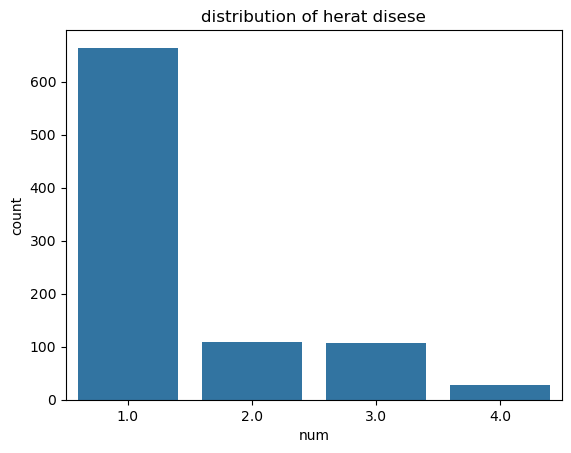

In [22]:
# plot the target variable  distribution
sns.countplot(x=data['num'])
plt.title("distribution of herat disese")
plt.show()

#### 4. Decision Tree Classification: 

In [23]:
# setting featrures and target variable
X = data.drop("num", axis=1)
y = data["num"]

In [24]:
# split the data as traing and testing 
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [25]:
# build the model
from sklearn.tree import DecisionTreeClassifier, plot_tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [26]:
# model testing
yhat_test = dt_model.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
print(classification_report(y_test, yhat_test))

              precision    recall  f1-score   support

         1.0       0.82      0.74      0.78       133
         2.0       0.18      0.23      0.20        22
         3.0       0.15      0.19      0.17        21
         4.0       0.29      0.33      0.31         6

    accuracy                           0.60       182
   macro avg       0.36      0.37      0.36       182
weighted avg       0.65      0.60      0.62       182



In [28]:
# check the confussion matrix
cm = confusion_matrix(y_test, yhat_test)
cm

array([[99, 19, 14,  1],
       [ 9,  5,  6,  2],
       [11,  4,  4,  2],
       [ 2,  0,  2,  2]], dtype=int64)

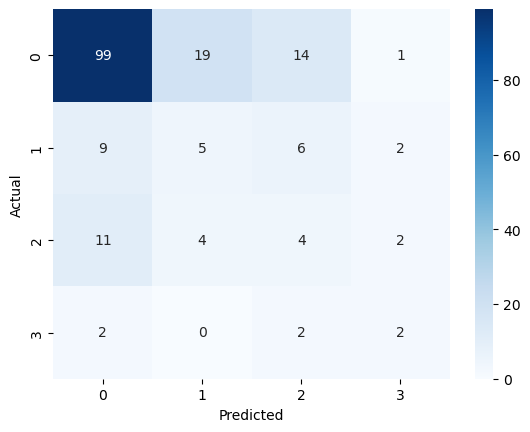

In [29]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [30]:
y_prob = dt_model.predict_proba(X_test)

In [31]:
# finding the roc_auc score
roc_auc = roc_auc_score(y_test, y_prob, multi_class= 'ovr', average='weighted')
roc_auc

0.6211076772606275

#### 5. Hyperparameter Tuning: 

In [32]:
param_grid = {
    "max_depth": [3, 5, 7, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "criterion": ["gini", "entropy"]
}


In [33]:
grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring="accuracy"
)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [34]:
best_model = grid.best_estimator_
grid.best_params_


{'criterion': 'entropy',
 'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

#### 6. Model Evaluation and Analysis: 

In [35]:
import warnings
warnings.filterwarnings("ignore")
y_pred_best = best_model.predict(X_test)
print(classification_report(y_test, y_pred_best))

              precision    recall  f1-score   support

         1.0       0.77      0.98      0.86       133
         2.0       0.17      0.09      0.12        22
         3.0       0.00      0.00      0.00        21
         4.0       0.00      0.00      0.00         6

    accuracy                           0.73       182
   macro avg       0.23      0.27      0.25       182
weighted avg       0.58      0.73      0.65       182



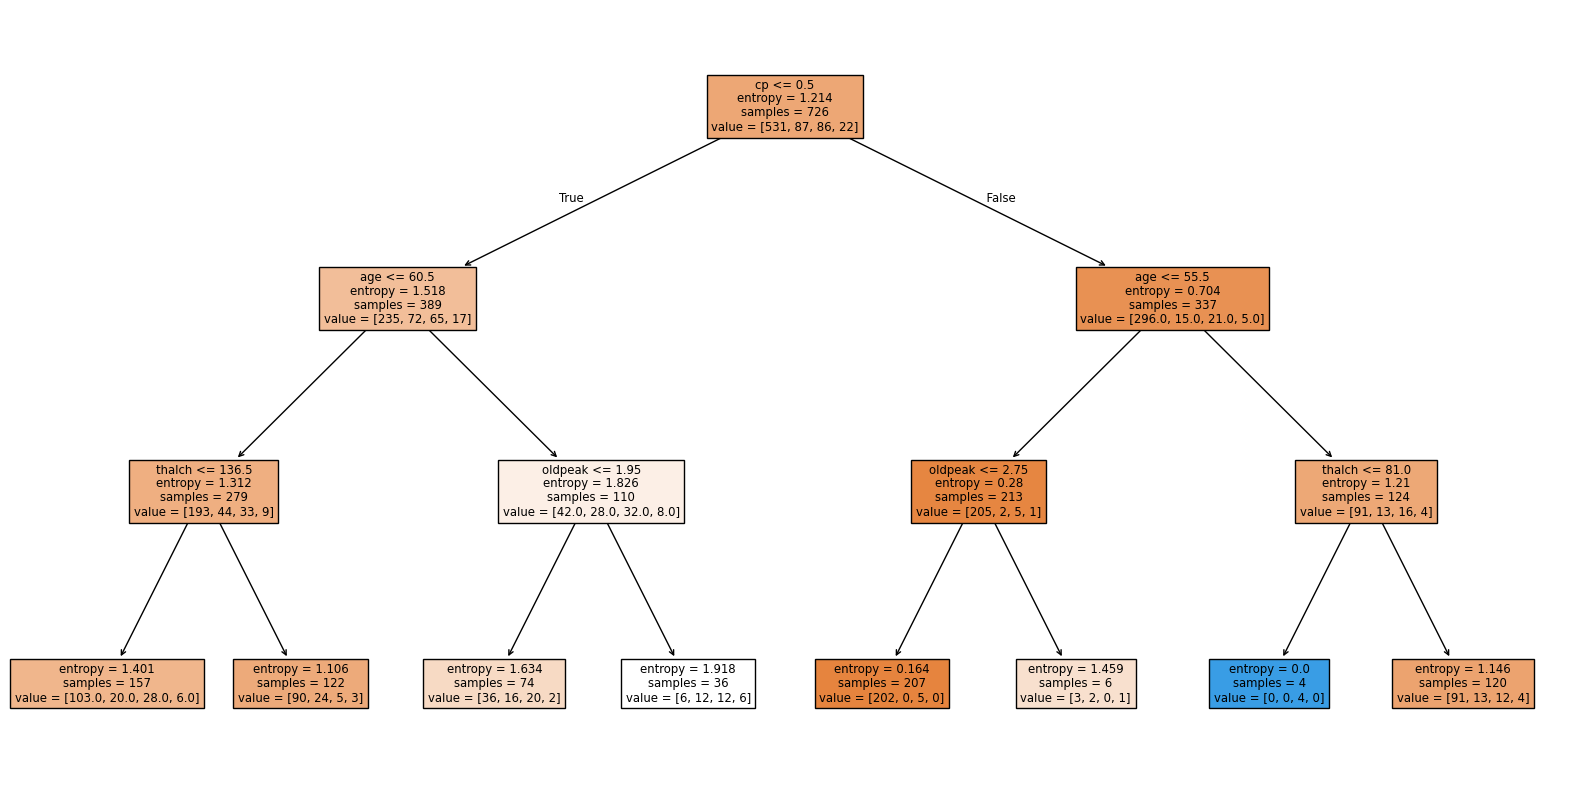

In [36]:
plt.figure(figsize=(20, 10))
plot_tree(
    best_model,
    feature_names=X.columns,
    filled=True
)
plt.show()


#### Interview Questions: 

##### comman decision tree hyperparameters are
##### 'max_depth', will control the tree complexcity
##### 'min_samples_split' will prevents overfitting
##### 'min_samples_leaf' will stebilizes the predictions
##### 'criterion' will measures the split qulity

##### Lable encoding is for single column and best for the tree model.
##### One-Hot encoding is for multiple columns and best for Linear models